In this chapter, we'll work with sections of a computed tomography (CT) scan from The Cancer Imaging Archive. CT uses a rotating X-ray tube to create a 3D image of the target area.

The actual content of the image depends on the instrument used: photographs measure visible light, x-ray and CT measure radiation absorbance, and MRI scanners measure magnetic fields.

To warm up, use the imageio package to load a single DICOM image from the scan volume and check out a few of its attributes.


Metadata

ImageIO reads in data as Image objects. These are standard NumPy arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:

    Patient demographics: name, age, sex, clinical information
    Acquisition information: image shape, sampling rates, data type, modality (such as X-Ray, CT or MRI)

Start this exercise by reading in the chest image and listing the available fields in the meta dictionary. 

In [20]:
# Import ImageIO
import imageio
import matplotlib.pyplot as plt
import numpy as np


Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


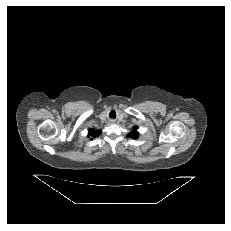

In [18]:
# Load "chest-220.dcm"
im = imageio.imread('dataset/tcia-chest-ct-sample/chest-220.dcm')

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

# Draw the image in grayscale. set vmin=-200 and vmax=200 to increase the contrast
plt.imshow(im, cmap='gray', vmin=-200, vmax=200)
plt.axis('off')
plt.show()

In [13]:
# Print the available metadata fields
print(im.meta.keys())

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])


In [21]:
# Read in each 2D image
im1 = imageio.imread('dataset/tcia-chest-ct-sample/chest-220.dcm')
im2 = imageio.imread('dataset/tcia-chest-ct-sample/chest-221.dcm')
im3 = imageio.imread('dataset/tcia-chest-ct-sample/chest-222.dcm')

# Stack images into a volume
vol = np.stack([im1, im2, im3], axis=0)
print('Volume dimensions:', vol.shape)

Volume dimensions: (3, 512, 512)


In [23]:
# Load the "tcia-chest-ct" directory
vol = imageio.volread('dataset/tcia-chest-ct-sample')

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

Reading DICOM (examining files): 1/5 files (20.0%5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)
Available metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
Shape of image array: (5, 512, 512)


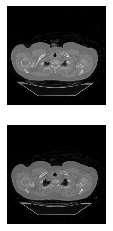

In [24]:
# Import PyPlot
import matplotlib.pyplot as plt

# Initialize figure and axes grid
fig, axes = plt.subplots(nrows=2, ncols=1)

# Draw an image on each subplot
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')

# Remove ticks/labels and render
axes[0].axis('off')
axes[1].axis('off')
plt.show()

IndexError: index 40 is out of bounds for axis 0 with size 5

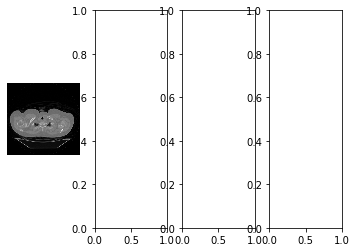

In [25]:
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1, ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = vol[ii * 40, :, :]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')

# Render the figure
plt.show()

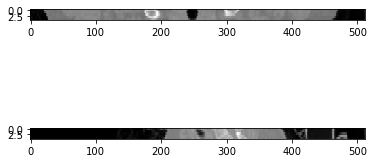

In [26]:
# Select frame from "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0 / d1

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray', aspect=asp1)
axes[1].imshow(im2, cmap='gray', aspect=asp2)
plt.show()